## Proyecto Marketing Analytics para empresa Fintech

## DESCRIPCIÓN DEL PROYECTO

Análisis de los datos de campañas de marketing de una empresa Fintech para
conseguir identificar patrones, tendencias y factores que influyen en que un
cliente acabe contratando un depósito. Tras un análisis exhaustivo de todos sus
datos, habrá que implementar un modelo simple que ayude a entender y predecir
la efectividad de las campañas de marketing, y diseñar un dashboard para la
capa ejecutiva de la fintech con los principales insights y KPIs de los resultados
de las campañas.

In [1]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import utils

# Expresiones regulares
import re
from fuzzywuzzy import process

In [2]:
df = pd.read_csv('bank-additional_bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## 1.Análisi de datos

### Revisión general de los datos

In [3]:
utils.check_df(df)

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 41,188 filas y 21 columnas.

##########################################################################################

¿Cuáles son las primeras 5 filas del conjunto de datos?


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no



##########################################################################################

¿Cuáles son las últimas cinco filas del conjunto de datos?


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no



##########################################################################################

¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
18448,38,services,married,high.school,no,no,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
29244,47,management,married,professional.course,no,yes,no,cellular,apr,fri,...,2,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
32202,53,admin.,married,high.school,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
19786,47,services,married,high.school,no,yes,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
3401,50,blue-collar,married,basic.6y,unknown,no,no,telephone,may,thu,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no



##########################################################################################

¿Cuál es el tipo de datos de cada columna?


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


##########################################################################################

¿Cuántas columnas hay de cada tipo de datos?


object     11
int64       5
float64     5
Name: count, dtype: int64


##########################################################################################

Variables numéricas:
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

##########################################################################################

Variables categóricas:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

##########################################################################################

¿Cuántos valores únicos tiene cada columna?


age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


##########################################################################################

Estadísticas descriptivas (numéricas):


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000



##########################################################################################

Estadísticas descriptivas (categóricas):


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548



##########################################################################################



(       age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
 0       56       261         1    999         0           1.1          93.994   
 1       57       149         1    999         0           1.1          93.994   
 2       37       226         1    999         0           1.1          93.994   
 3       40       151         1    999         0           1.1          93.994   
 4       56       307         1    999         0           1.1          93.994   
 ...    ...       ...       ...    ...       ...           ...             ...   
 41183   73       334         1    999         0          -1.1          94.767   
 41184   46       383         1    999         0          -1.1          94.767   
 41185   56       189         2    999         0          -1.1          94.767   
 41186   44       442         1    999         0          -1.1          94.767   
 41187   74       239         3    999         1          -1.1          94.767   
 
        cons.c

### DATOS --> Valores nulos y/o faltantes y duplicados

In [4]:
utils.identificacion_valores_problem(df)

###################################################################################
3.1.1. Proporción de NULOS en cada una de las columnas del conjunto de datos:
age               0.0
campaign          0.0
nr.employed       0.0
euribor3m         0.0
cons.conf.idx     0.0
cons.price.idx    0.0
emp.var.rate      0.0
poutcome          0.0
previous          0.0
pdays             0.0
duration          0.0
job               0.0
day_of_week       0.0
month             0.0
contact           0.0
loan              0.0
housing           0.0
default           0.0
education         0.0
marital           0.0
y                 0.0
dtype: float64
###################################################################################
3.1.2. Número de DUPLICADOS totales: 12
###################################################################################
3.1.3. Columnas numéricas con OUTLIERS
Número de outliers en la columna "age": 469
Número de outliers en la columna "duration": 2963
Número de outliers e

## Pregunta de negocio

¿Qué factores influyen en que un cliente contrate un depósito (y = yes) y cómo podemos optimizar las campañas para aumentar las contrataciones?

Variable objetivo

y → contratación del depósito (yes / no).

## Vista general

In [5]:
# tasa de conversión

df.y.value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

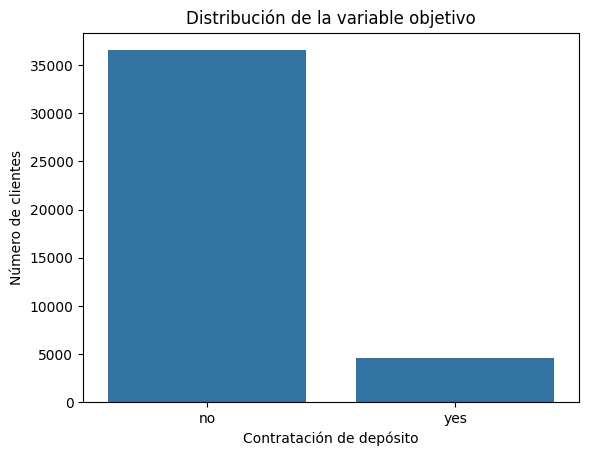

In [6]:
sns.countplot(x='y', data=df)
plt.title('Distribución de la variable objetivo')
plt.xlabel('Contratación de depósito')
plt.ylabel('Número de clientes')
plt.show()

In [7]:
Conversión= df.y.value_counts(normalize=True) * 100
Conversión


y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64

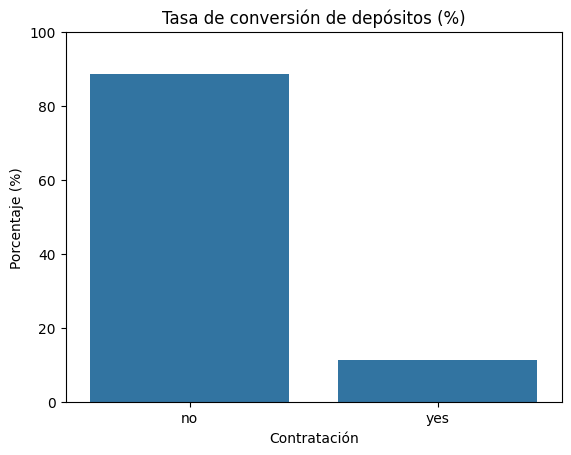

In [8]:

df_conv = Conversión.reset_index()
df_conv.columns = ['y', 'porcentaje']

sns.barplot(x='y', y='porcentaje', data=df_conv)
plt.title('Tasa de conversión de depósitos (%)')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Contratación')
plt.ylim(0, 100)
plt.show()

Observamos que solo el 11,27% se los contactos acaban con la contratación de ls depósitos

## General

In [9]:
print('Número de llamadas:', df.shape[0])

Número de llamadas: 41188


In [10]:
df.campaign.mean()

np.float64(2.567592502670681)

In [11]:
contacto_nominal = df.contact.value_counts()
contacto_pct = df.contact.value_counts(normalize=True)
contacto_comb= pd.merge(contacto_nominal,contacto_pct, on=['contact'])
contacto_comb


,count,proportion
contact,,
cellular,26144,0.634748
telephone,15044,0.365252


In [12]:
# tasa de conversion segun la cantidad de llamadas
conv_contacto = df.groupby('contact')['y'].apply(lambda x: (x=='yes').mean()*100).reset_index()
conv_contacto.columns = ['contact','pct_contratación']
conv_contacto.sort_values(by='pct_contratación', ascending=False)

,contact,pct_contratación
0,cellular,14.737607
1,telephone,5.231321


## Perfil clientes

In [13]:
df_copy = df.copy()

## AGE

In [14]:
px.histogram(df_copy, x="age", nbins=25)

In [15]:

bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['0-25', '25-35', '35-45', '45-55', '55-65', '+65']

df_copy['intervalo_edad'] = pd.cut(
    df_copy['age'],
    bins=bins, 
    labels = labels,
    right = False,
    ordered=True
)


In [16]:
px.histogram(df_copy, 
             x='intervalo_edad',
             category_orders= {'intervalo_edad' : labels})


In [17]:
conv_age = df_copy.groupby('intervalo_edad')['y'].apply(lambda x: (x=='yes').mean()*100).reset_index()
conv_age.columns = ['intervalo_edad','pct_contratación']
conv_age

C:\Users\diego\AppData\Local\Temp\ipykernel_11100\329027347.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,intervalo_edad,pct_contratación
0,0-25,23.970037
1,25-35,12.173024
2,35-45,8.651852
3,45-55,8.651195
4,55-65,13.568825
5,+65,47.209653


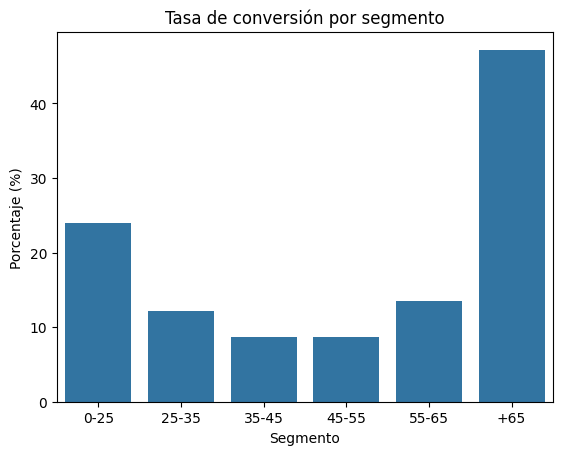

In [18]:
sns.barplot(x='intervalo_edad', y='pct_contratación', data=conv_age)
plt.title('Tasa de conversión por segmento')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Segmento')
plt.show()

In [19]:
df[df.age >= 65] # eliminar outliers?

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27713,70,retired,divorced,basic.4y,no,yes,no,cellular,mar,mon,...,3,999,0,nonexistent,-1.8,92.843,-50.0,1.811,5099.1,yes
27723,66,technician,married,professional.course,no,yes,no,cellular,mar,tue,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.799,5099.1,yes
27757,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,...,9,999,0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,no
27774,67,retired,single,university.degree,no,yes,yes,cellular,mar,mon,...,22,999,0,nonexistent,-1.8,92.843,-50.0,1.703,5099.1,no
27780,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,...,1,999,1,failure,-1.8,92.843,-50.0,1.687,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41052,65,retired,married,basic.4y,no,no,no,cellular,oct,wed,...,1,999,0,nonexistent,-1.1,94.601,-49.5,1.043,4963.6,yes
41058,65,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,1,3,3,success,-1.1,94.601,-49.5,1.043,4963.6,yes
41153,67,housemaid,divorced,professional.course,no,yes,no,cellular,nov,mon,...,2,5,5,success,-1.1,94.767,-50.8,1.039,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Al analizar la tasa de conversión por grupos de edad, se observa que los clientes más jóvenes (18-25) y los mayores de 65 años son los que presentan **mayor porcentaje de contratación de depósitos**. 

Sin embargo, estos mismos segmentos son los que **menos contactos reciben** durante las campañas, lo que indica una oportunidad clara de mejora. Incrementar de manera controlada la frecuencia de contacto con estos grupos podría traducirse en un **aumento significativo de las contrataciones** sin necesidad de aumentar el volumen total de clientes contactados.

## Job

<Axes: xlabel='count', ylabel='job'>

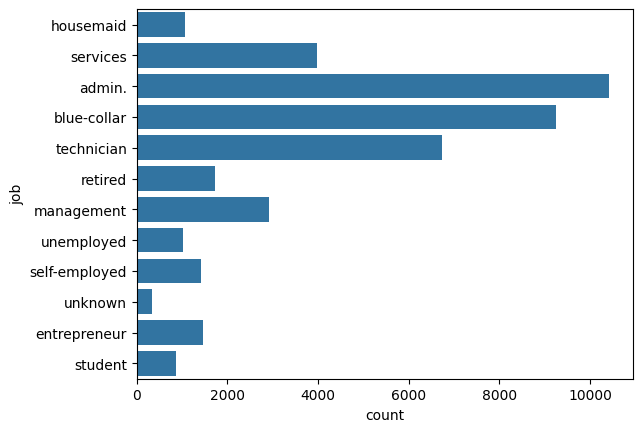

In [20]:
sns.countplot(y='job', data=df_copy)

In [21]:
job_nominal = df_copy.groupby('job')['y'].value_counts()
job_nominal

job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
Name: count, dtype: int64

In [22]:
job_pct= df_copy.groupby('job')['y'].value_counts(normalize=True)*100
job_pct

job            y  
admin.         no     87.027442
               yes    12.972558
blue-collar    no     93.105684
               yes     6.894316
entrepreneur   no     91.483516
               yes     8.516484
housemaid      no     90.000000
               yes    10.000000
management     no     88.782490
               yes    11.217510
retired        no     74.767442
               yes    25.232558
self-employed  no     89.514426
               yes    10.485574
services       no     91.861930
               yes     8.138070
student        no     68.571429
               yes    31.428571
technician     no     89.173958
               yes    10.826042
unemployed     no     85.798817
               yes    14.201183
unknown        no     88.787879
               yes    11.212121
Name: proportion, dtype: float64

In [23]:
combinado = pd.merge(job_nominal,job_pct, on=['job','y'])
combinado

count  proportion
job           y                     
admin.        no    9070   87.027442
              yes   1352   12.972558
blue-collar   no    8616   93.105684
              yes    638    6.894316
entrepreneur  no    1332   91.483516
              yes    124    8.516484
housemaid     no     954   90.000000
              yes    106   10.000000
management    no    2596   88.782490
              yes    328   11.217510
retired       no    1286   74.767442
              yes    434   25.232558
self-employed no    1272   89.514426
              yes    149   10.485574
services      no    3646   91.861930
              yes    323    8.138070
student       no     600   68.571429
              yes    275   31.428571
technician    no    6013   89.173958
              yes    730   10.826042
unemployed    no     870   85.798817
              yes    144   14.201183
unknown       no     293   88.787879
              yes     37   11.212121

In [24]:
#solo coger los si
conv_job = df_copy.groupby('job')['y'].apply(lambda x: (x=='yes').mean()*100).reset_index()
conv_job.columns = ['job','pct_contratación']
conv_job.sort_values(by='pct_contratación', ascending=False)

,job,pct_contratación
8,student,31.428571
5,retired,25.232558
10,unemployed,14.201183
0,admin.,12.972558
4,management,11.217510
11,unknown,11.212121
9,technician,10.826042
6,self-employed,10.485574
3,housemaid,10.000000
2,entrepreneur,8.516484


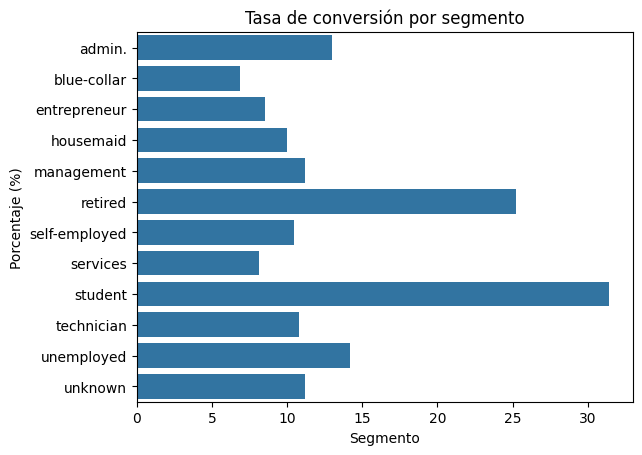

In [25]:
sns.barplot(y='job', x='pct_contratación', data=conv_job)
plt.title('Tasa de conversión por segmento')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Segmento')
plt.show()

Al analizar la tasa de conversión por tipo de trabajo, se observa que ciertos segmentos presentan una mayor propensión a contratar depósitos. 

En particular, los **estudiantes** y los **jubilados** muestran los **porcentajes más altos de contratación**, mientras que otros trabajos como los **empleados de servicios** o los **blue collar** presentan tasas de conversión más bajas. 

Esto indica que los esfuerzos de contacto deberían enfocarse en los segmentos con mayor propensión, especialmente aquellos que históricamente reciben menos contactos, para **maximizar la efectividad de las campañas de marketing**.

<Axes: xlabel='age', ylabel='job'>

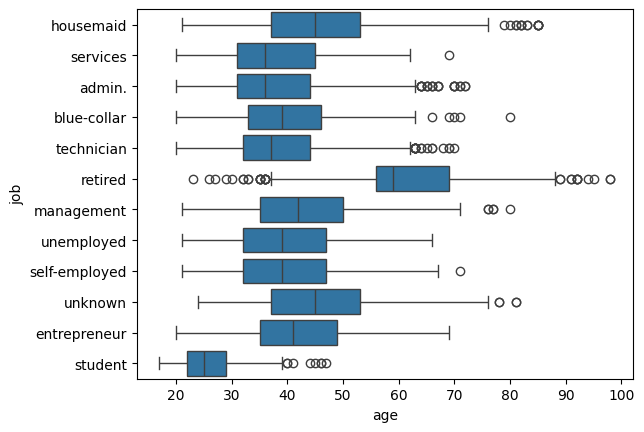

In [26]:
sns.boxplot(x='age', y='job', data=df_copy)

## educacion de los clientes

<Axes: xlabel='count', ylabel='education'>

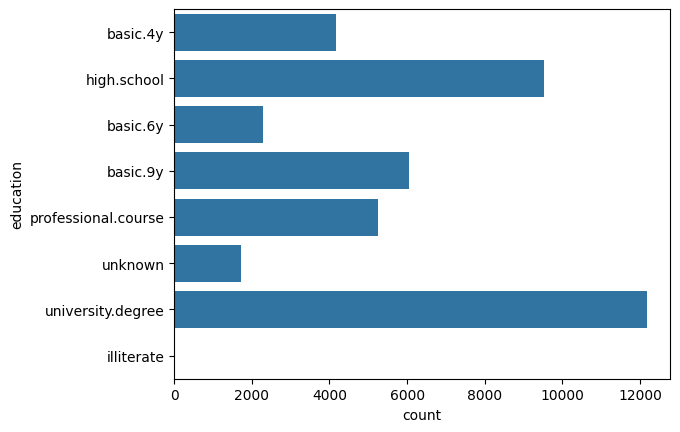

In [27]:
sns.countplot(y='education', data=df_copy)

In [28]:
education_nominal = df_copy.groupby('education')['y'].value_counts()
education_nominal

education            y  
basic.4y             no      3748
                     yes      428
basic.6y             no      2104
                     yes      188
basic.9y             no      5572
                     yes      473
high.school          no      8484
                     yes     1031
illiterate           no        14
                     yes        4
professional.course  no      4648
                     yes      595
university.degree    no     10498
                     yes     1670
unknown              no      1480
                     yes      251
Name: count, dtype: int64

In [29]:
education_pct= df_copy.groupby('education')['y'].value_counts(normalize=True)*100
education_pct

education            y  
basic.4y             no     89.750958
                     yes    10.249042
basic.6y             no     91.797557
                     yes     8.202443
basic.9y             no     92.175352
                     yes     7.824648
high.school          no     89.164477
                     yes    10.835523
illiterate           no     77.777778
                     yes    22.222222
professional.course  no     88.651535
                     yes    11.348465
university.degree    no     86.275477
                     yes    13.724523
unknown              no     85.499711
                     yes    14.500289
Name: proportion, dtype: float64

In [30]:
combinado_education = pd.merge(education_nominal,education_pct, on=['education','y'])
combinado_education

count  proportion
education           y                     
basic.4y            no    3748   89.750958
                    yes    428   10.249042
basic.6y            no    2104   91.797557
                    yes    188    8.202443
basic.9y            no    5572   92.175352
                    yes    473    7.824648
high.school         no    8484   89.164477
                    yes   1031   10.835523
illiterate          no      14   77.777778
                    yes      4   22.222222
professional.course no    4648   88.651535
                    yes    595   11.348465
university.degree   no   10498   86.275477
                    yes   1670   13.724523
unknown             no    1480   85.499711
                    yes    251   14.500289

In [31]:
#solo coger los si
conv_education = df_copy.groupby('education')['y'].apply(lambda x: (x=='yes').mean()*100).reset_index()
conv_education.columns = ['education','pct_contratación']
conv_education.sort_values(by='pct_contratación', ascending=False)

,education,pct_contratación
4,illiterate,22.222222
7,unknown,14.500289
6,university.degree,13.724523
5,professional.course,11.348465
3,high.school,10.835523
0,basic.4y,10.249042
1,basic.6y,8.202443
2,basic.9y,7.824648


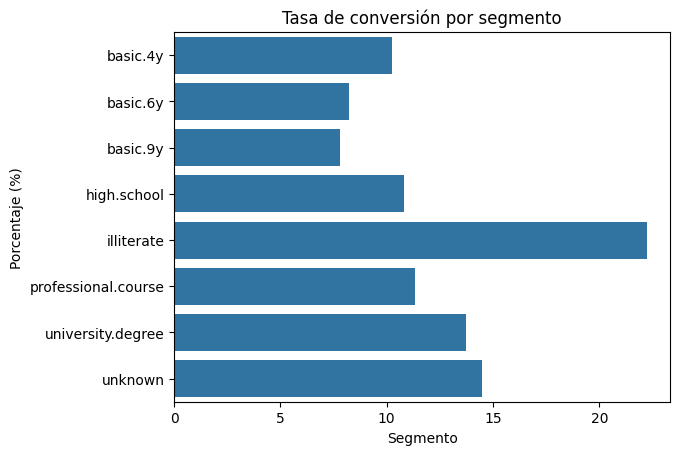

In [32]:
sns.barplot(y='education', x='pct_contratación', data=conv_education)
plt.title('Tasa de conversión por segmento')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Segmento')
plt.show()

## Marriage

<Axes: xlabel='count', ylabel='marital'>

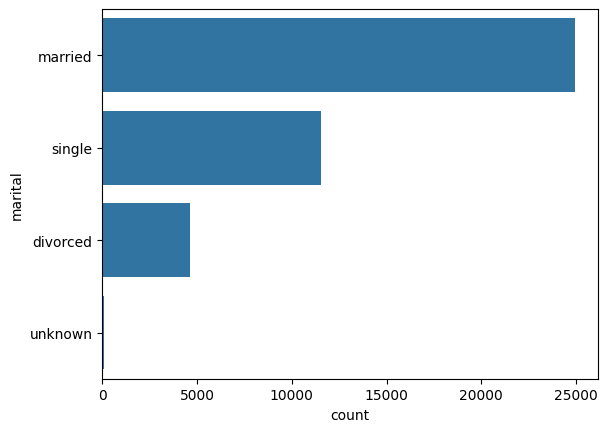

In [33]:
sns.countplot(y='marital', data=df_copy)

In [34]:
marital_nominal = df_copy.groupby('marital')['y'].value_counts()
marital_nominal

marital   y  
divorced  no      4136
          yes      476
married   no     22396
          yes     2532
single    no      9948
          yes     1620
unknown   no        68
          yes       12
Name: count, dtype: int64

In [35]:
marital_pct= df_copy.groupby('marital')['y'].value_counts(normalize=True)*100
marital_pct

marital   y  
divorced  no     89.679098
          yes    10.320902
married   no     89.842747
          yes    10.157253
single    no     85.995851
          yes    14.004149
unknown   no     85.000000
          yes    15.000000
Name: proportion, dtype: float64

In [36]:
combinado_marital = pd.merge(marital_nominal,marital_pct, on=['marital','y'])
combinado_marital

count  proportion
marital  y                     
divorced no    4136   89.679098
         yes    476   10.320902
married  no   22396   89.842747
         yes   2532   10.157253
single   no    9948   85.995851
         yes   1620   14.004149
unknown  no      68   85.000000
         yes     12   15.000000

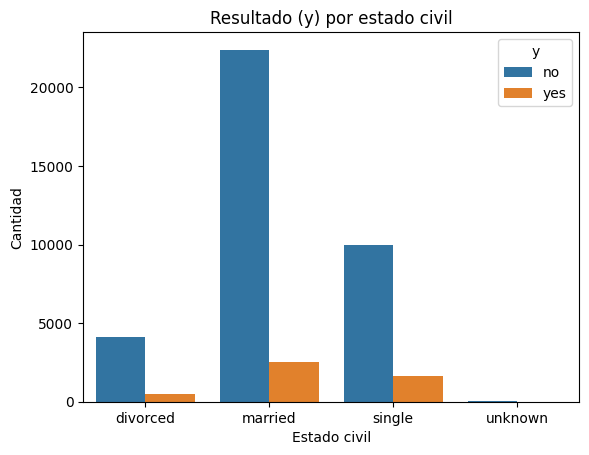

In [37]:
sns.barplot(
    data=combinado_marital,
    x='marital',
    y='count',
    hue='y'
)

plt.xlabel('Estado civil')
plt.ylabel('Cantidad')
plt.title('Resultado (y) por estado civil')
plt.show()

## Numero de contactos 'Campaign'

la columna campaña nos indica cuantas veces se ha contactado con el cliente durante la campaña.
Queremos saber cuanta cantidad de llamadas se han realizado a cada segmento de edad y de trabajo.
Con el objetivo de ver si hay déficit o si se puede aprovechar mas en algun sector.

In [38]:
px.histogram(df_copy,x='campaign',nbins=100)

In [39]:
#Contactos por grupo de edad

df_copy.groupby('intervalo_edad')['campaign'].mean()

C:\Users\diego\AppData\Local\Temp\ipykernel_11100\2725736492.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



intervalo_edad
0-25     2.321161
25-35    2.532077
35-45    2.589852
45-55    2.640395
55-65    2.620690
+65      2.003017
Name: campaign, dtype: float64

In [40]:
# contactos medio por trabajo
df_copy.groupby('job')['campaign'].mean()

job
admin.           2.623489
blue-collar      2.558461
entrepreneur     2.535714
housemaid        2.639623
management       2.476060
retired          2.476744
self-employed    2.660802
services         2.587805
student          2.104000
technician       2.577339
unemployed       2.564103
unknown          2.648485
Name: campaign, dtype: float64

Aun que los grupos de edades de entre 0-25 y  +65 son los en proporción mas contratan depositos, de media reciben el mismo numero de llamadas que todos los demas grupos de edades.
Por lo que no se necesita un numero de llamadas superior para que este grupo de edades contraten su servicio.

## Duracion de las llamadas

In [41]:
# voy a quitar los outliers de la duration ya que pueden crear malentendidos
limite_inferior, limite_superior = utils.limites_outliers(df_copy,'duration')

Valor del segundo cuartil (25%): 102.00
Valor del tercer cuartil (75%): 319.00
Valor del rango intercuartil (IQR): 217.00
Los valores atípicos se definen como aquellos que caen fuera del siguiente rango:
	 - Límite inferior (considerado extremadamente bajo): -223.50
	 - Límite superior (considerado extremadamente alto): 644.50


In [42]:
df_sin_outliers = df_copy[(df_copy['duration'] >= limite_inferior) & (df_copy['duration'] <= limite_superior)]

<Axes: xlabel='duration', ylabel='y'>

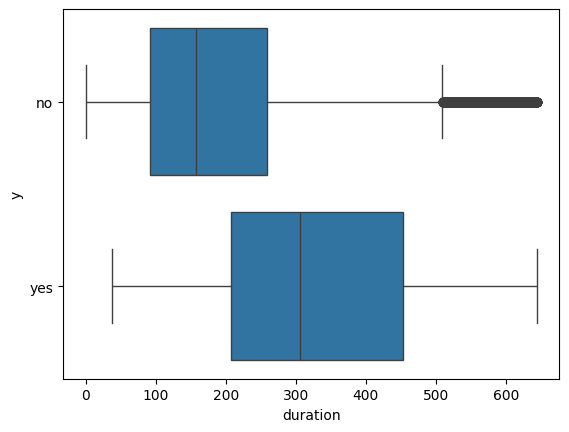

In [43]:
sns.boxplot(x='duration', y='y', data=df_sin_outliers)

In [44]:
pd.crosstab(df_sin_outliers['job'] , df_sin_outliers['duration'])

duration,0,1,2,3,4,5,6,7,8,9,...,635,636,637,638,639,640,641,642,643,644
job,,,,,,,,,,,,,,,,,,,,,
admin.,1,0,0,1,5,7,11,17,16,22,...,3,2,1,5,4,0,4,2,6,2
blue-collar,2,1,0,1,3,8,4,12,16,17,...,3,2,3,1,0,2,2,2,2,2
entrepreneur,0,0,1,0,0,1,1,4,6,4,...,0,1,1,1,1,0,1,1,0,0
housemaid,0,0,0,0,0,0,0,1,1,5,...,0,0,1,1,0,0,0,0,0,0
management,1,0,0,0,1,1,0,2,8,2,...,0,2,2,3,0,2,1,0,0,1
retired,0,1,0,0,0,0,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
self-employed,0,0,0,0,1,2,1,0,2,2,...,0,0,0,0,1,1,0,0,1,1
services,0,1,0,0,0,3,6,4,4,8,...,1,2,0,0,1,2,0,1,3,0
student,0,0,0,0,0,2,3,2,0,3,...,0,0,1,0,0,0,0,1,0,0


In [45]:
pd.crosstab(df_sin_outliers['intervalo_edad'] , df_sin_outliers['duration'])

duration,0,1,2,3,4,5,6,7,8,9,...,635,636,637,638,639,640,641,642,643,644
intervalo_edad,,,,,,,,,,,,,,,,,,,,,
0-25,0,0,0,0,0,1,1,3,2,4,...,0,0,1,1,0,1,0,1,0,0
25-35,1,0,0,1,6,15,22,18,22,27,...,0,3,4,4,2,2,6,2,10,2
35-45,1,2,0,1,3,6,8,17,25,18,...,7,3,2,8,3,4,2,4,3,4
45-55,1,0,1,1,2,5,4,11,16,21,...,2,4,4,0,4,0,1,3,2,2
55-65,1,0,0,0,1,3,2,5,4,7,...,1,0,0,1,0,2,1,0,0,2
+65,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


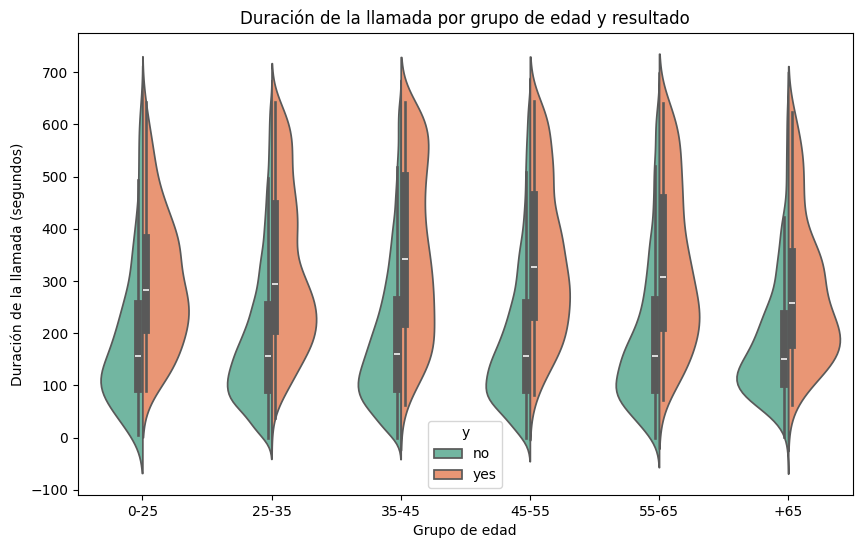

In [46]:
plt.figure(figsize=(10,6))
sns.violinplot(x='intervalo_edad', y='duration', hue='y', data=df_sin_outliers, split=True, palette='Set2')
plt.title('Duración de la llamada por grupo de edad y resultado')
plt.ylabel('Duración de la llamada (segundos)')
plt.xlabel('Grupo de edad')
plt.show()

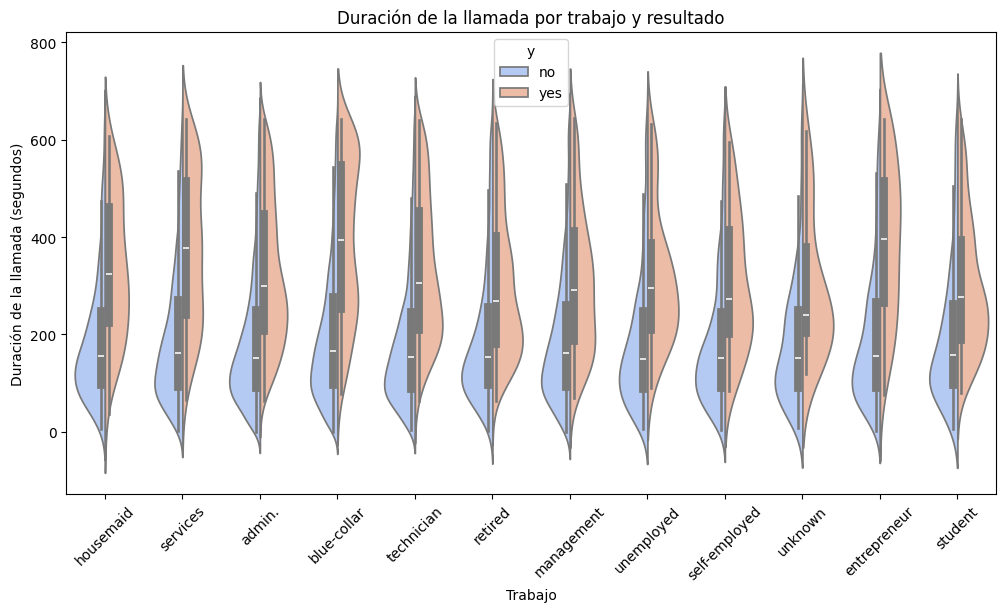

In [47]:
plt.figure(figsize=(12,6))
sns.violinplot(x='job', y='duration', hue='y', data=df_sin_outliers, split=True, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Duración de la llamada por trabajo y resultado')
plt.ylabel('Duración de la llamada (segundos)')
plt.xlabel('Trabajo')
plt.show()

## Cruces finales

C:\Users\diego\AppData\Local\Temp\ipykernel_11100\3174239040.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



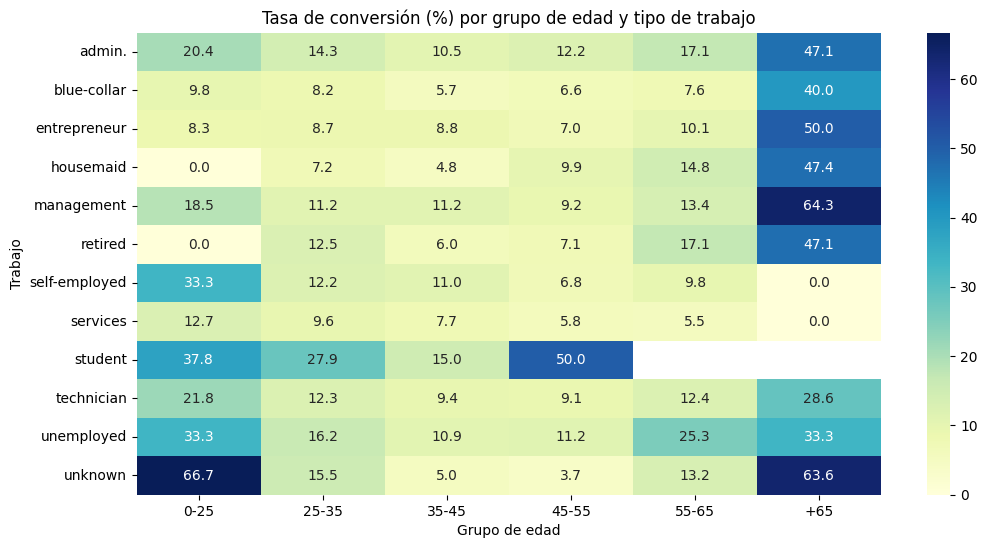

In [48]:
df_age_job = df_copy.groupby(['intervalo_edad','job'])['y'].apply(lambda x: (x=='yes').mean()*100).reset_index()
df_age_job_pivot = df_age_job.pivot(index='job', columns='intervalo_edad', values='y')

plt.figure(figsize=(12,6))
sns.heatmap(df_age_job_pivot, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Tasa de conversión (%) por grupo de edad y tipo de trabajo')
plt.ylabel('Trabajo')
plt.xlabel('Grupo de edad')
plt.show()

## INTRODUCCION DE COLUMNA AÑOS

In [ ]:
# 2018 acaba en el indice 27689
df_copy[df_copy.month == 'dec'].head(11)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,intervalo_edad
27680,31,admin.,single,high.school,no,yes,no,telephone,dec,mon,...,999,0,nonexistent,-0.2,92.756,-45.9,3.816,5176.3,no,25-35
27681,39,housemaid,married,basic.4y,no,yes,no,telephone,dec,wed,...,999,1,failure,-0.2,92.756,-45.9,3.743,5176.3,no,35-45
27682,41,technician,divorced,professional.course,no,no,yes,cellular,dec,thu,...,999,0,nonexistent,-0.2,92.756,-45.9,3.669,5176.3,no,35-45
27683,37,admin.,married,high.school,no,yes,no,telephone,dec,fri,...,999,0,nonexistent,-0.2,92.756,-45.9,3.563,5176.3,no,35-45
27684,48,admin.,married,high.school,no,yes,yes,telephone,dec,fri,...,999,0,nonexistent,-0.2,92.756,-45.9,3.563,5176.3,no,45-55
27685,51,blue-collar,married,basic.4y,no,yes,yes,telephone,dec,mon,...,999,0,nonexistent,-0.2,92.756,-45.9,3.488,5176.3,no,45-55
27686,39,technician,married,professional.course,no,yes,no,telephone,dec,tue,...,999,0,nonexistent,-0.2,92.756,-45.9,3.428,5176.3,no,35-45
27687,36,blue-collar,married,high.school,no,yes,no,cellular,dec,thu,...,999,0,nonexistent,-0.2,92.756,-45.9,3.329,5176.3,no,35-45
27688,55,unemployed,divorced,professional.course,no,no,no,telephone,dec,fri,...,999,0,nonexistent,-0.2,92.756,-45.9,3.282,5176.3,no,55-65
27689,44,blue-collar,married,basic.4y,no,yes,yes,telephone,dec,mon,...,999,0,nonexistent,-0.2,92.756,-45.9,3.053,5176.3,yes,35-45


In [54]:
#2019 empieza en el indice 27690
df_copy.loc[27690]

age                        26
job                   student
marital                single
education            basic.9y
default                    no
housing                   yes
loan                       no
contact              cellular
month                     mar
day_of_week               mon
duration                  712
campaign                    4
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate             -1.8
cons.price.idx         92.843
cons.conf.idx           -50.0
euribor3m               1.811
nr.employed            5099.1
y                         yes
intervalo_edad          25-35
Name: 27690, dtype: object

In [ ]:
# 2019 acaba en el indice 39129
df_copy[df_copy.month == 'dec'].tail(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,intervalo_edad
39129,59,management,married,university.degree,no,yes,no,cellular,dec,thu,...,6,1,success,-3.0,92.713,-33.0,0.7,5023.5,no,55-65


In [61]:
#2020 empieza en el indice 39130
df_copy.loc[39130]

age                              39
job                          admin.
marital                      single
education         university.degree
default                          no
housing                         yes
loan                             no
contact                   telephone
month                           mar
day_of_week                     mon
duration                        229
campaign                          1
pdays                           999
previous                          1
poutcome                    failure
emp.var.rate                   -1.8
cons.price.idx               93.369
cons.conf.idx                 -34.8
euribor3m                     0.655
nr.employed                  5008.7
y                               yes
intervalo_edad                35-45
Name: 39130, dtype: object

In [62]:
df_copy['Año']= 2020
df_copy.loc[df_copy.index <= 27689, 'Año'] = 2018
df_copy.loc[(df_copy.index > 27689) & (df_copy.index <= 39129), 'Año'] = 2019
df_copy.loc[df_copy.index > 39129, 'Año'] = 2020

In [69]:
df_copy[df_copy.Año==2020].tail(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,intervalo_edad,Año
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no,+65,2020


In [ ]:
bins = [0,2,4,6]
labels = ['0-2','2-4','+5']

df_copy['intervalo_euribor'] = pd.cut(
    df_copy['euribor3m'],
    bins=bins, 
    labels = labels,
    right = False,
    ordered=True)

px.histogram(df_copy, 
             x='intervalo_euribor',
             category_orders= {'intervalo_euribor' : labels})

In [ ]:
estaciones = {
    'dec': 'Invierno', 'jan': 'Invierno', 'feb': 'Invierno',
    'mar': 'Primavera', 'apr': 'Primavera', 'may': 'Primavera',
    'jun': 'Verano', 'jul': 'Verano', 'aug': 'Verano',
    'sep': 'Otoño', 'oct': 'Otoño', 'nov': 'Otoño'
}
df_copy['estaciones'] = df_copy['month'].map(estaciones)

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df,
    x='job',
    y='duration',
    hue='y'
)